In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow
from tensorflow.keras import applications
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D

In [2]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/Deep Learning /Parking Space Detection /train_data.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
cwd = os.getcwd()

In [4]:
os.listdir("/content/train_data/train")

['empty', 'occupied']

In [5]:
print(os.listdir("/content/train_data"))

print(os.listdir("/content/train_data/train"))
print(os.listdir("/content/train_data/test"))


['test', 'train']
['empty', 'occupied']
['empty', 'occupied']


In [6]:
# counting files in all subfolders of a specific folder

folder = "/content/train_data/train"
files_train = 0
for subfolder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, subfolder)))
    files_train += len(files)
print(files_train)


# path: Current directory path.
# dirs: Subdirectories in the current directory.
# files: Files in the current directory.

432


In [7]:
files_test = 0

folder = "/content/train_data/test"
for subfolder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, subfolder)))
    files_test += len(files)

print(files_test)

164


In [8]:
# Setting same dimensions for all images
img_width, img_height = 48,48
train_data_dir = "/content/train_data/train"
validation_data_dir = "/content/train_data/test"

In [9]:
train_samples = files_train
validation_samples = files_test
batch_size = 32
epochs = 15
num_classes = 2

In [10]:
# Building model on top of pretrained VGG
model = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))
# include_top=False:
# Removes the fully connected layers.
# Allows the addition of custom layers for fine-tuning on a different task.
# Flexible input shape can be used (you define it using input_shape).


# pre trained weights

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [12]:
# Freezing first 10 layers of the model
for layers in model.layers[:10]:
  layers.trainable = False

In [13]:
x = model.output # Refers to the output of the pre-trained model
x = Flatten()(x) # Converts the multi-dimensional feature into a 1D vector.

predictions = Dense(num_classes, activation = 'softmax')(x)
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss = 'categorical_crossentropy',
                    optimizer = optimizers.SGD(learning_rate = 0.0001, momentum=0.9),
                    metrics=['accuracy'])

In [14]:
# Data Augmentation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.1,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    rotation_range = 5
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.1,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    rotation_range = 5
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 432 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [15]:
history = model_final.fit(
    train_generator,
    steps_per_epoch = train_samples // batch_size,
    epochs = epochs,
    validation_data = test_generator,
    validation_steps = validation_samples // batch_size
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.5189 - loss: 0.6990 - val_accuracy: 0.7625 - val_loss: 0.4479
Epoch 2/15
 1/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.7188 - loss: 0.4534

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 238ms/step - accuracy: 0.7188 - loss: 0.4534 - val_accuracy: 1.0000 - val_loss: 0.1414
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.7893 - loss: 0.3699 - val_accuracy: 0.8750 - val_loss: 0.3066
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9062 - loss: 0.2176 - val_accuracy: 1.0000 - val_loss: 0.1114
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.9346 - loss: 0.2602 - val_accuracy: 0.9250 - val_loss: 0.2319
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 1.0000 - loss: 0.1366 - val_accuracy: 1.0000 - val_loss: 0.0856
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.9646 - loss: 0.1846 - val_accuracy: 0.9062 - val_loss: 0.2205
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9688 - loss: 0.1566 - val_accuracy: 1.0000 - val_loss: 0.1606
Epoch 9/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.9821 - loss: 0.1257 - val_accuracy: 0.9312 - val_loss: 0.18

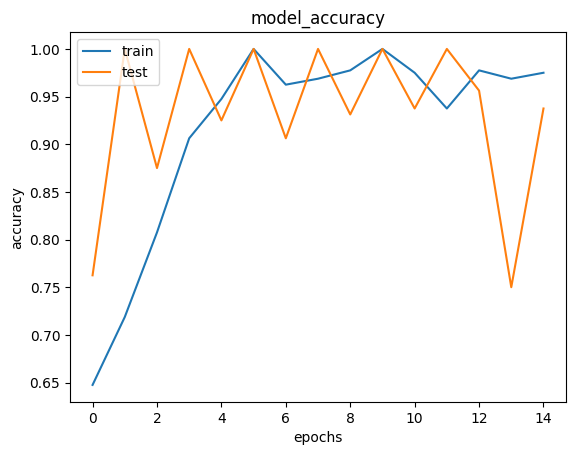

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [17]:
model_final.save('model_final.h5')

In [18]:
class_dictionary = {}
class_dictionary[0] = 'no_car'
class_dictionary[1] = 'car'

In [19]:
class_dictionary

{0: 'no_car', 1: 'car'}

In [20]:
# maikng a predictive system

import cv2
import numpy as np


In [21]:
def make_prediction(img_path):
  img = cv2.imread(img_path)
  img = cv2.resize(img, (img_width, img_height))
  img = img/255

  img = np.expand_dims(img, axis=0) # (1,48,48,3) no of images,img_height,img_width,channels
  prediction = model_final.predict(img)
  predicted_class_index = np.argmax(prediction, axis=1)[0]
  predicted_class_name = class_dictionary[predicted_class_index]
  return predicted_class_name

In [22]:
prediction = make_prediction('/content/train_data/train/empty/roi_30.png')

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
no_car


In [23]:
prediction = make_prediction('/content/train_data/train/occupied/roi_17.png')

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
car
